# Portfolio Analysis of Consumer staples sector

### Stocks under observation:

    - PepsiCo (NASDAQ:PEP) 
    - Procter & Gamble (NYSE:PG)
    - Unilever (NYSE:UL)
    - Walmart (NYSE:WMT)
    - Coca-Cola (NYSE:KO)
    - Costco Wholesale (NASDAQ:COST)


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [2]:
staples = ['PEP', 'PG', 'UL', 'WMT','KO', 'COST' ]
data = pd.DataFrame()
for i in range(len(staples)):
    
    df = wb.DataReader(staples[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = staples[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,COST,KO,PEP,PG,UL,WMT
Date,,,,,,
2020-01-02,290.213654,54.511929,134.909073,121.868492,56.104584,117.897430
2020-01-03,290.452667,54.214535,134.720337,121.048851,56.025867,116.856636
2020-01-06,290.532288,54.194706,135.236847,121.216728,56.084904,116.618736
2020-01-07,290.074310,53.778362,133.111191,120.466217,55.179676,115.538292
2020-01-08,293.399689,53.877491,133.796570,120.979729,54.943527,115.141792


Text(0, 0.5, 'price in $')

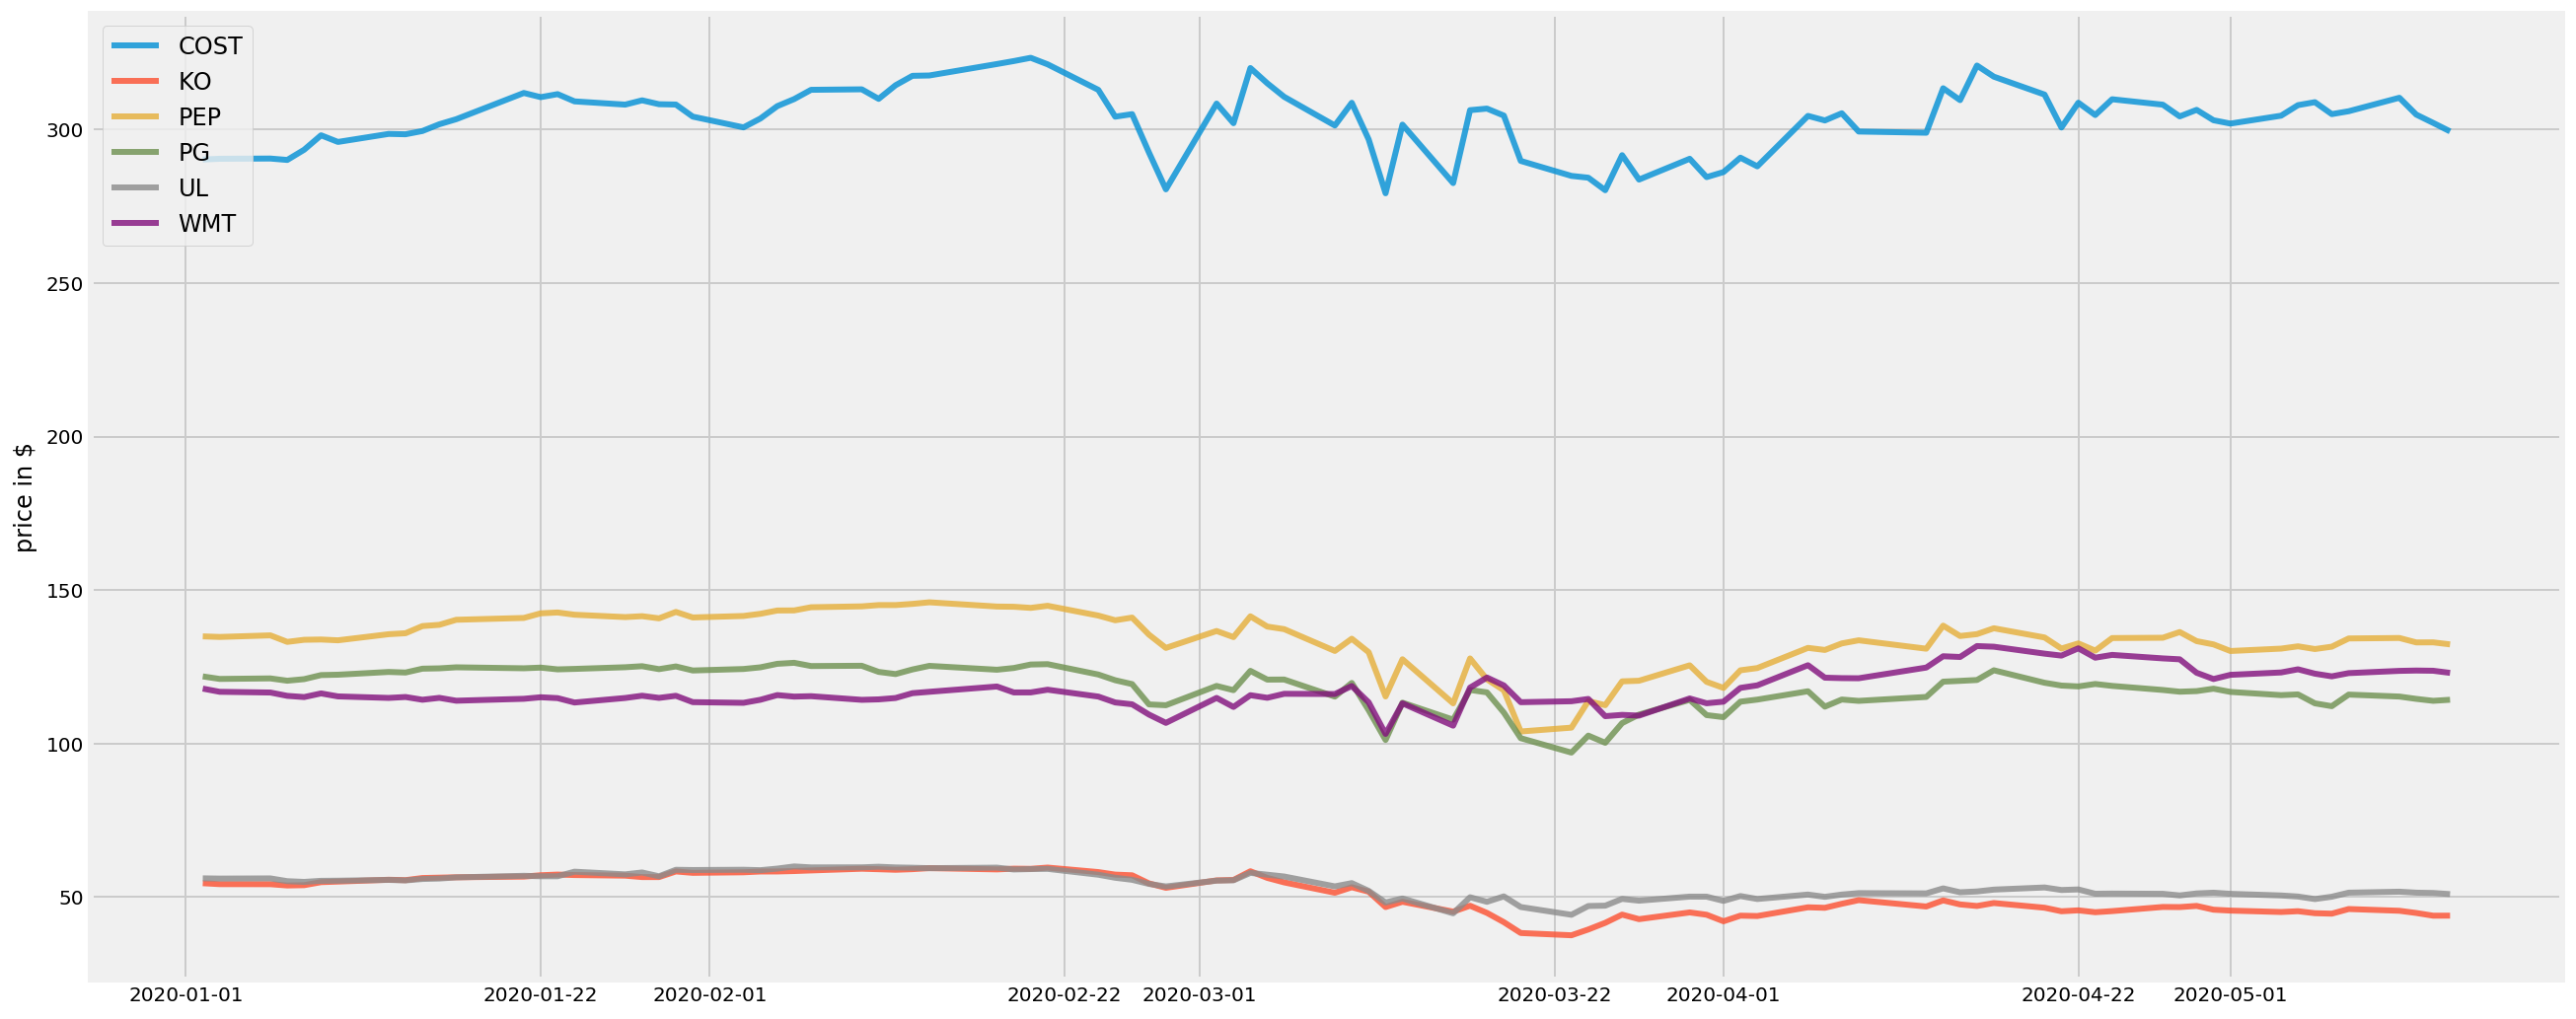

In [3]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

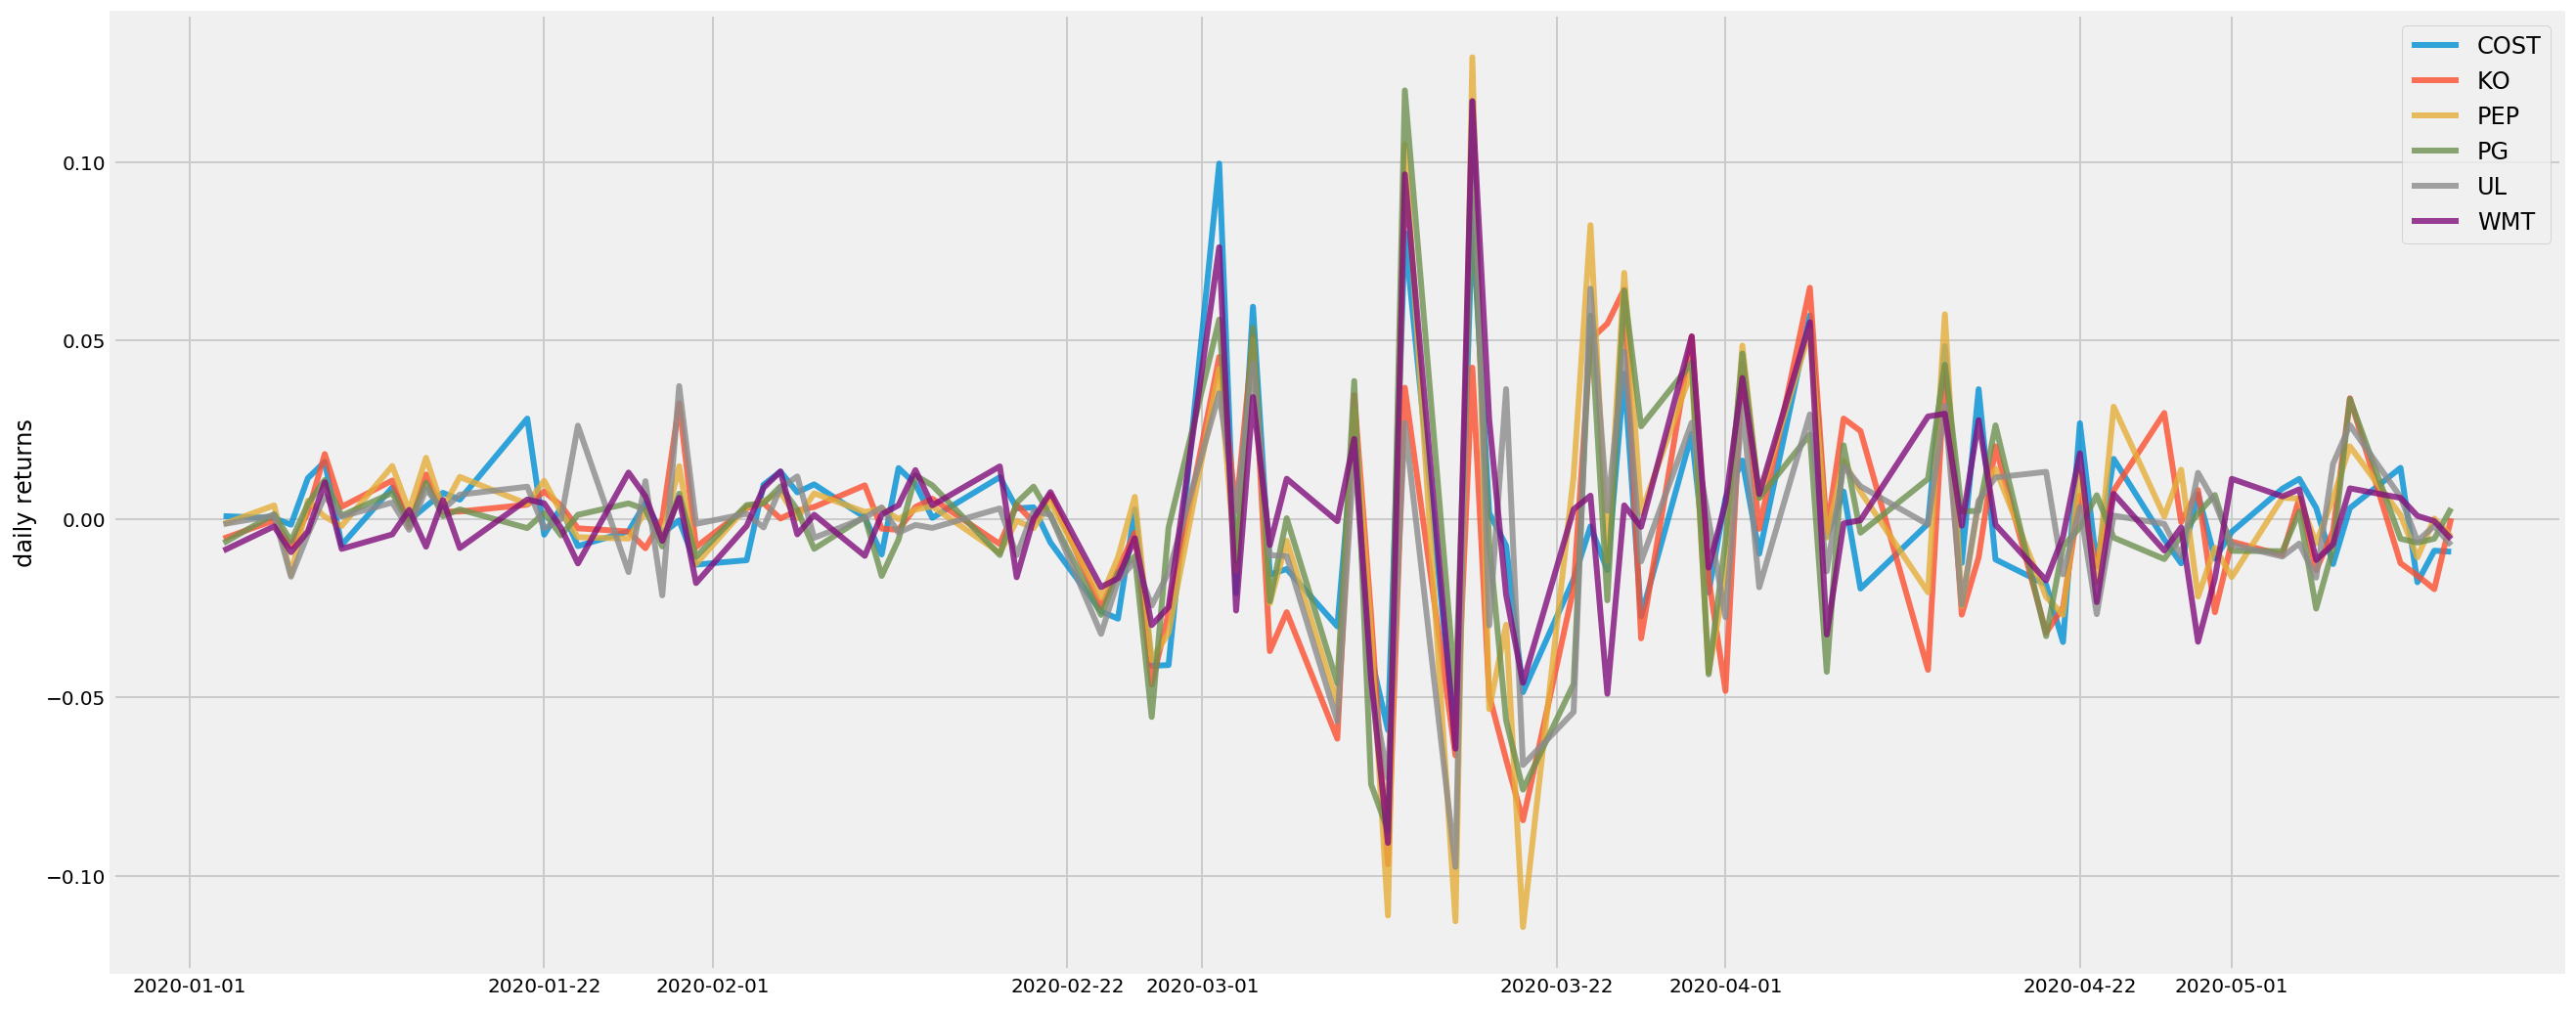

In [4]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

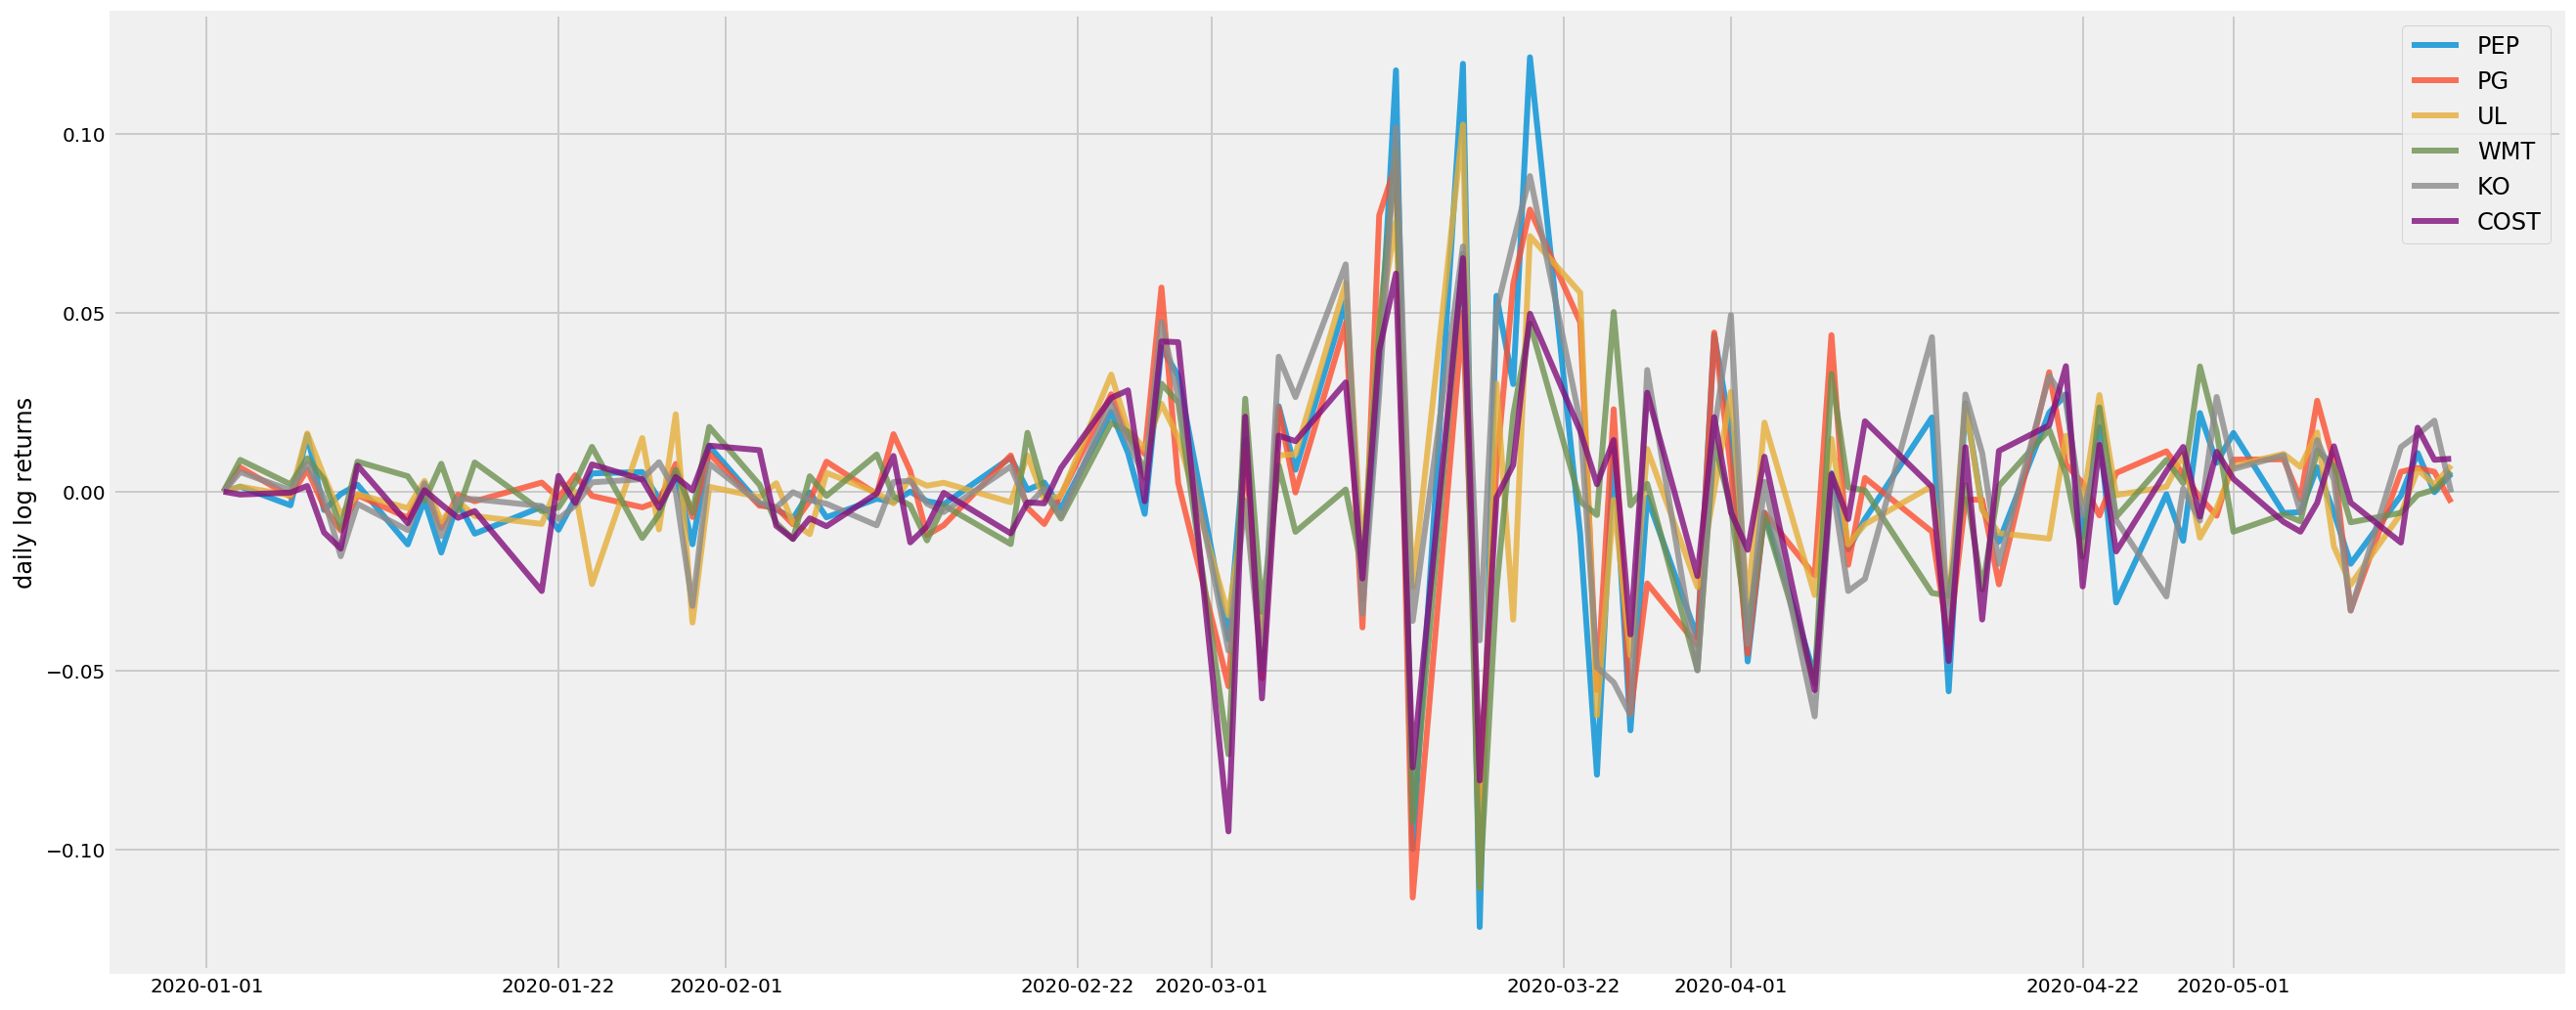

In [5]:
log = pd.DataFrame(columns = staples, index = table.index)

for i in range(len(staples)):
    log_list = []
    for j in range(len(table[staples[i]])):
        if(j+1<len(table[staples[i]])):
            log_returns =  np.log(table[staples[i]][j]) - np.log(table[staples[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[staples[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

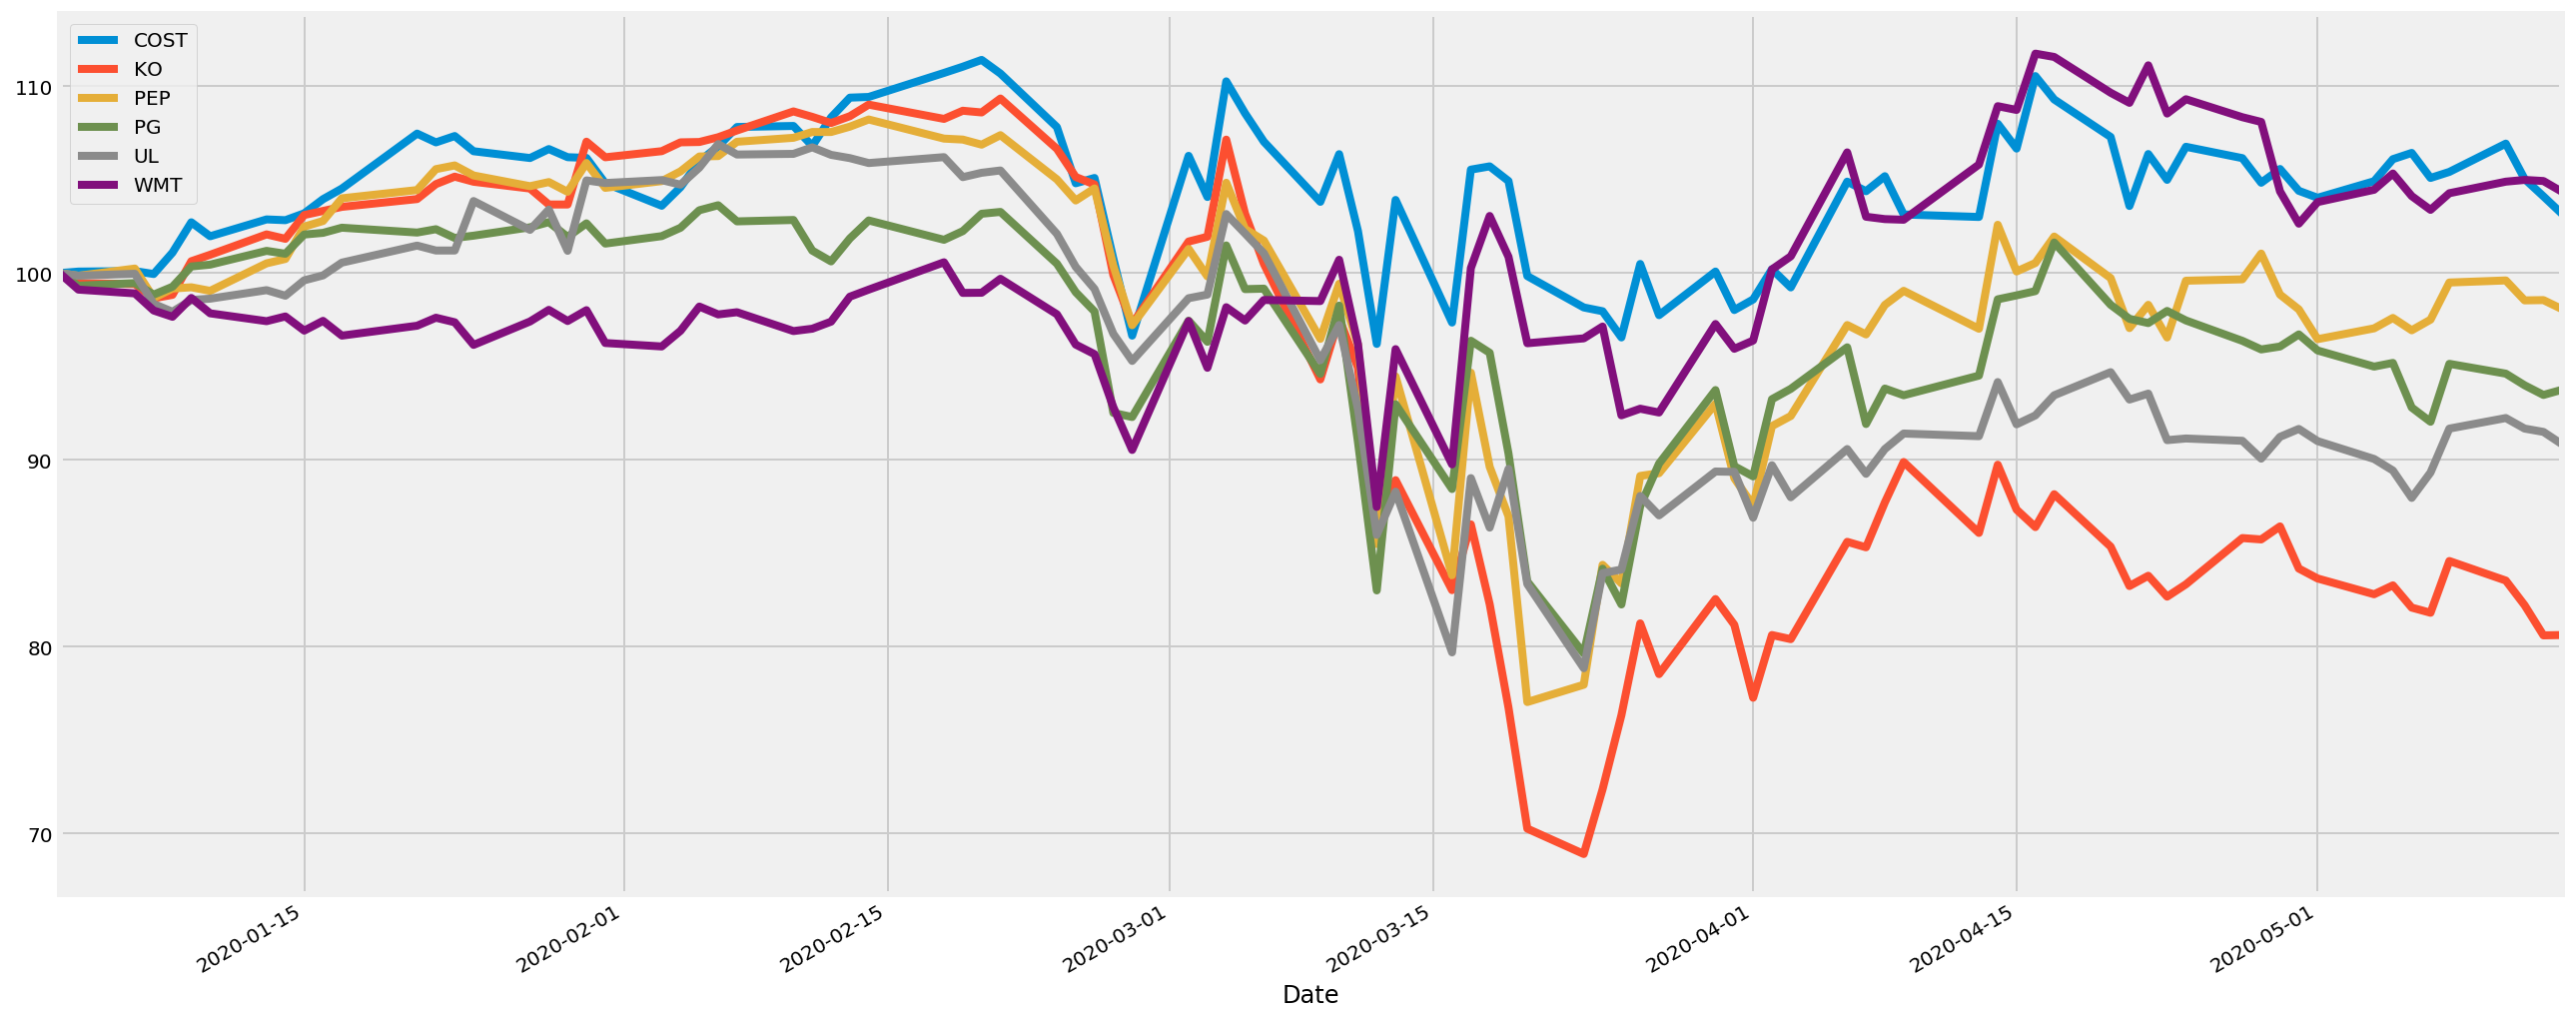

In [6]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [7]:
returns

,COST,KO,PEP,PG,UL,WMT
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000824,-0.005456,-0.001399,-0.006726,-0.001403,-0.008828
2020-01-06,0.000274,-0.000366,0.003834,0.001387,0.001054,-0.002036
2020-01-07,-0.001576,-0.007682,-0.015718,-0.006191,-0.016140,-0.009265
2020-01-08,0.011464,0.001843,0.005149,0.004263,-0.004280,-0.003432
...,...,...,...,...,...,...
2020-05-08,0.003082,0.033857,0.020372,0.033699,0.026311,0.008614
2020-05-11,0.014349,-0.012362,0.001118,-0.005520,0.006168,0.005938
2020-05-12,-0.017691,-0.015810,-0.010716,-0.006591,-0.006130,0.000889


In [8]:
log.mean()*252

PEP     0.052917
PG      0.174563
UL      0.260607
WMT    -0.115248
KO      0.583575
COST   -0.084261
dtype: float64

In [9]:
log.std()*252**0.5

PEP     0.562073
PG      0.490804
UL      0.437680
WMT     0.434461
KO      0.482905
COST    0.414881
dtype: float64